## Connect to database

In [1]:
import psycopg2
import pandas as pd
import numpy as np

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

## Classification based on Jaccard index for nouns

### Finding the Jaccard index

In [3]:
import itertools
import time
from datetime import timedelta, datetime
from collections import defaultdict

In [4]:
cursor.execute("SELECT DISTINCT noun, STRING_AGG(adjective, ',') FROM final_pairs GROUP BY noun")
adjectives_listed = cursor.fetchall() 

In [5]:
adjectives_listed[0]

('sõidurada', 'täiendav,uus,parempoolne,suunduv,suletud,väljuv')

In [6]:
dict_nouns = {}

for tup in adjectives_listed:
    adjs = tup[1].split(',')
    if len(adjs) >= 3:
        dict_nouns[tup[0]] = adjs

In [8]:
noun_pairs = list(itertools.combinations(dict_nouns.keys(), 2))
len(noun_pairs)

16915836

In [9]:
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
start = datetime.now()

noun_similarities = defaultdict(dict)

for pair in noun_pairs:
    first_word = pair[0]
    second_word = pair[1]
    first_word_adjs = dict_nouns[first_word]
    second_word_adjs = dict_nouns[second_word]
    similarity = len(set(first_word_adjs) & set(second_word_adjs))/len(set(first_word_adjs) | set(second_word_adjs))
    
    noun_similarities[first_word][second_word] = similarity
    noun_similarities[second_word][first_word] = similarity
    
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
print(datetime.now()-start)

0:29:52.306866
0:31:35.527285
0:01:43.221418


### Creating the similarity/distance matrix

In [10]:
import pandas as pd
import numpy as np

In [11]:
noun_df = pd.DataFrame(noun_similarities)
noun_df = noun_df.reindex(sorted(noun_df.columns), axis=1)
noun_df = noun_df.reindex(sorted(noun_df.index), axis=0)
noun_df = noun_df.fillna(1)

In [12]:
noun_df

,Bondi-film,C-vitamiin,CN-kood,EM-finaalturniir,EM-valikmäng,EM-valikturniir,EM-võistlus,HI-viirus,ID-kaart,MK-etapp,...,üürileping,üürnik,šampoon,šanss,šiiit,šokk,šokolaad,žanr,žest,žürii
Bondi-film,1.000000,0.000000,0.076923,0.142857,0.111111,0.166667,0.000000,0.166667,0.125000,0.153846,...,0.090909,0.142857,0.0,0.166667,0.0,0.071429,0.0,0.166667,0.000000,0.000000
C-vitamiin,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.066667,0.0,0.062500,0.0,0.000000,0.100000,0.047619
CN-kood,0.076923,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,...,0.052632,0.043478,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
EM-finaalturniir,0.142857,0.000000,0.000000,1.000000,0.333333,0.800000,0.375000,0.000000,0.000000,0.214286,...,0.000000,0.058824,0.0,0.066667,0.0,0.000000,0.0,0.000000,0.000000,0.000000
EM-valikmäng,0.111111,0.000000,0.000000,0.333333,1.000000,0.375000,0.181818,0.000000,0.000000,0.187500,...,0.000000,0.052632,0.0,0.058824,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
šokk,0.071429,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.058824,0.000000,...,0.050000,0.086957,0.0,0.150000,0.0,1.000000,0.0,0.066667,0.058824,0.074074
šokolaad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,...,0.000000,0.055556,0.1,0.062500,0.0,0.000000,1.0,0.000000,0.000000,0.000000
žanr,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.111111,0.000000,...,0.083333,0.062500,0.0,0.071429,0.0,0.066667,0.0,1.000000,0.000000,0.000000
žest,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.062500,0.0,0.058824,0.0,0.000000,1.000000,0.045455


### SpectralClustering

In [16]:
from sklearn.cluster import SpectralClustering
from collections import defaultdict
import pickle

In [17]:
clustering = SpectralClustering(n_clusters=1000, affinity='precomputed', random_state=0)

In [18]:
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
start = datetime.now()

clustering.fit(noun_df.values)

print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
print(datetime.now()-start)

1:52:38.777201
2:19:12.686832
0:26:33.910629


In [19]:
clustering.labels_

array([  2, 861, 221, ..., 806, 861, 403])

In [202]:
labels = defaultdict(list)

for i, label in enumerate(clustering.labels_):
    labels[label].append(noun_df.index[i])

In [299]:
import pickle

with open("jaccard_labels.pickle", "wb") as f:
    pickle.dump(labels, f)

In [301]:
with open("jaccard_labels.pickle", "rb") as f:
    test_labels = pickle.load(f)

In [22]:
for i in range(1000):
    print(f"Topic {i} has {len(labels[i])} words")

Topic 0 has 4 words
Topic 1 has 1 words
Topic 2 has 29 words
Topic 3 has 1 words
Topic 4 has 1 words
Topic 5 has 1 words
Topic 6 has 1 words
Topic 7 has 1 words
Topic 8 has 1 words
Topic 9 has 3 words
Topic 10 has 1 words
Topic 11 has 1 words
Topic 12 has 1 words
Topic 13 has 1 words
Topic 14 has 1 words
Topic 15 has 1 words
Topic 16 has 1 words
Topic 17 has 1 words
Topic 18 has 1 words
Topic 19 has 1 words
Topic 20 has 1 words
Topic 21 has 1 words
Topic 22 has 1 words
Topic 23 has 1 words
Topic 24 has 1 words
Topic 25 has 1 words
Topic 26 has 1 words
Topic 27 has 1 words
Topic 28 has 2 words
Topic 29 has 1 words
Topic 30 has 1 words
Topic 31 has 31 words
Topic 32 has 1 words
Topic 33 has 1 words
Topic 34 has 1 words
Topic 35 has 1 words
Topic 36 has 1 words
Topic 37 has 1 words
Topic 38 has 1 words
Topic 39 has 1 words
Topic 40 has 2 words
Topic 41 has 1 words
Topic 42 has 2 words
Topic 43 has 1 words
Topic 44 has 1 words
Topic 45 has 2 words
Topic 46 has 1 words
Topic 47 has 1 words


In [23]:
long_topics = []
short_topics = []
medium_topics = []

for i in range(1000):
    topic_len = len(labels[i])
    if topic_len >= 100:
        long_topics.append(i)
    elif topic_len <= 5:
        short_topics.append(i)
    else:
        medium_topics.append(i)

In [25]:
print(f"{len(long_topics)} topics have 100 words or more")
print(f"{len(short_topics)} topics have 5 words or less")
print(f"{len(medium_topics)} topic lengths are between 5 and 100 (not included)")

5 topics have 100 words or more
927 topics have 5 words or less
68 topic lengths are between 5 and 100 (not included)


In [26]:
for i in long_topics:
    print(f"Topic number {i} has {len(labels[i])} nouns")

Topic number 56 has 245 nouns
Topic number 610 has 105 nouns
Topic number 767 has 172 nouns
Topic number 787 has 129 nouns
Topic number 861 has 2835 nouns


In [109]:
topic_lens = [len(nouns) for label, nouns in labels.items()]

In [123]:
topic_lens_ids = [(str(label), len(nouns)) for label, nouns in labels.items()]

In [124]:
sorted_lens = sorted(topic_lens_ids, key=lambda x: x[1], reverse=True)

In [152]:
chart_data = sorted_lens[:10]

In [153]:
other = 0

for label, count in sorted_lens[10:]:
    other += count

In [154]:
chart_data.extend([('muu', other)])

#### plot

In [155]:
import matplotlib.pyplot as plt

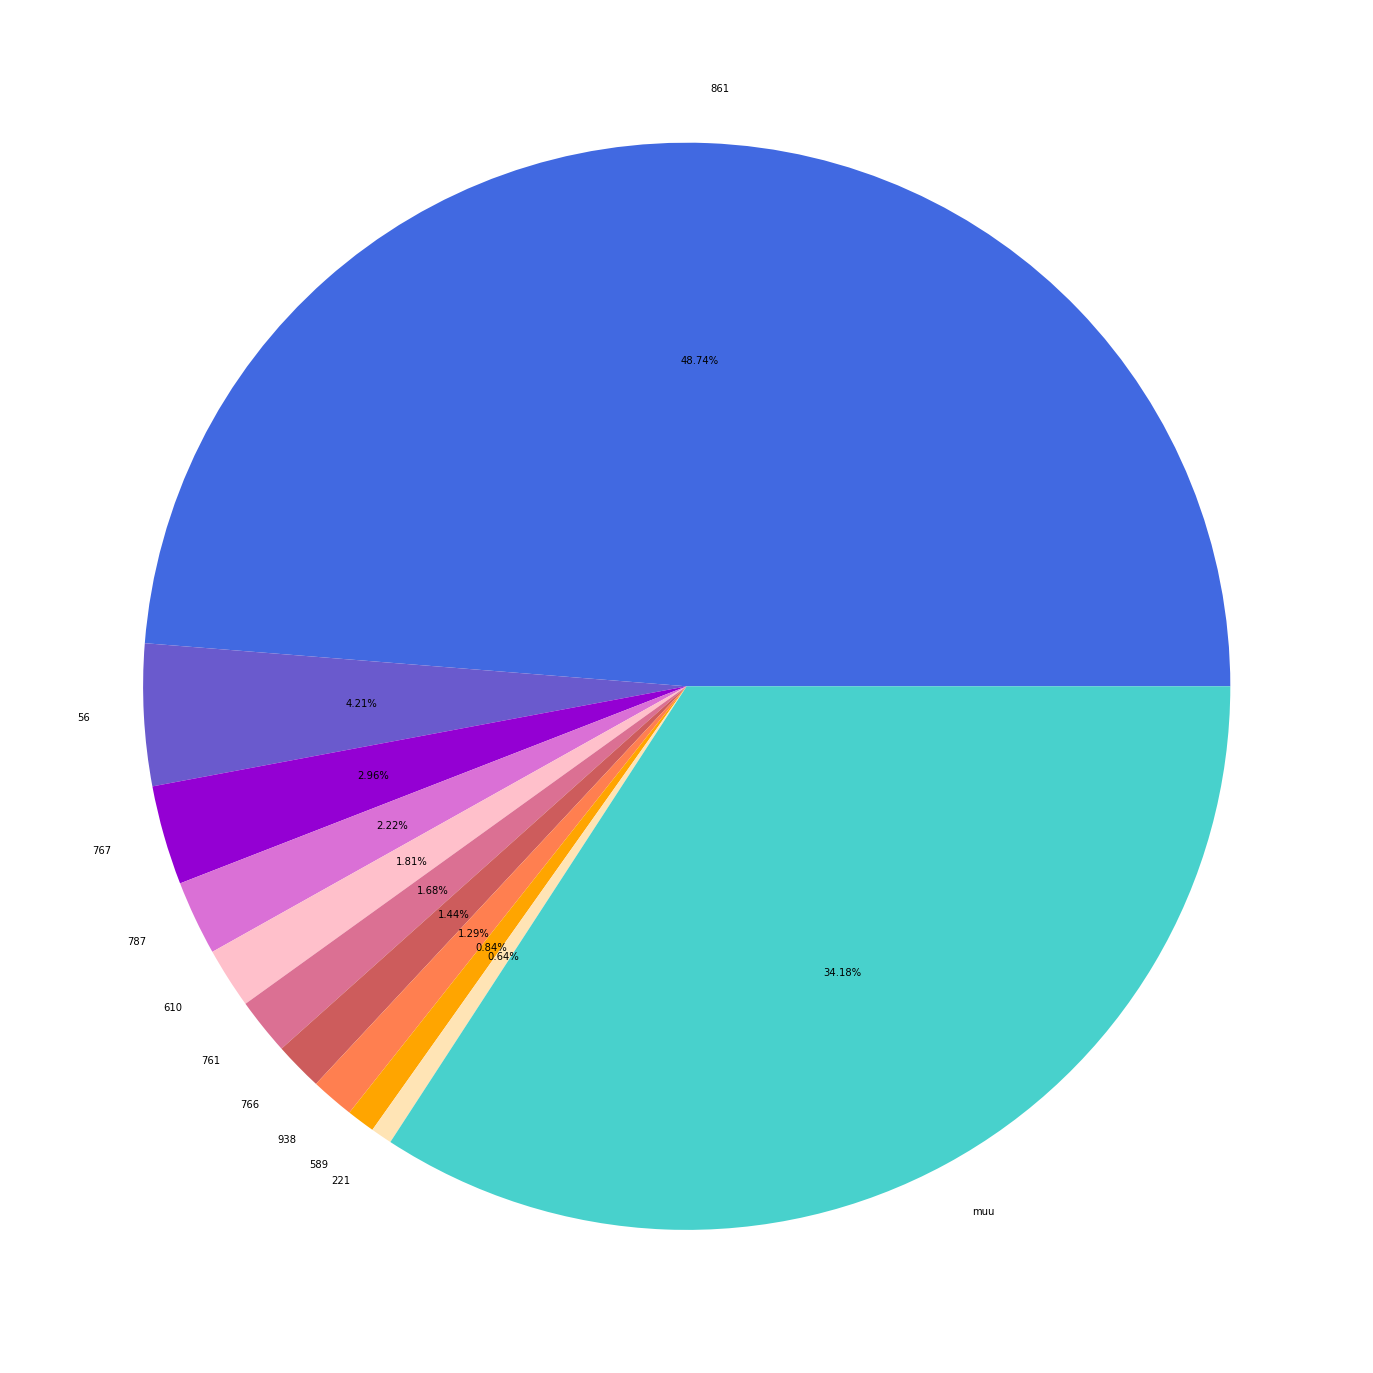

In [194]:
plt.figure(figsize=(15, 15))
plt.pie([count for label, count in chart_data], labels=[label for label, count in chart_data], pctdistance=0.6, autopct='%1.2f%%', colors=['royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink', 'palevioletred', 'indianred', 'coral', 'orange', 'moccasin', 'mediumturquoise'])
# plt.savefig("jaccard_clust_esimene_piechart.png")
plt.show()

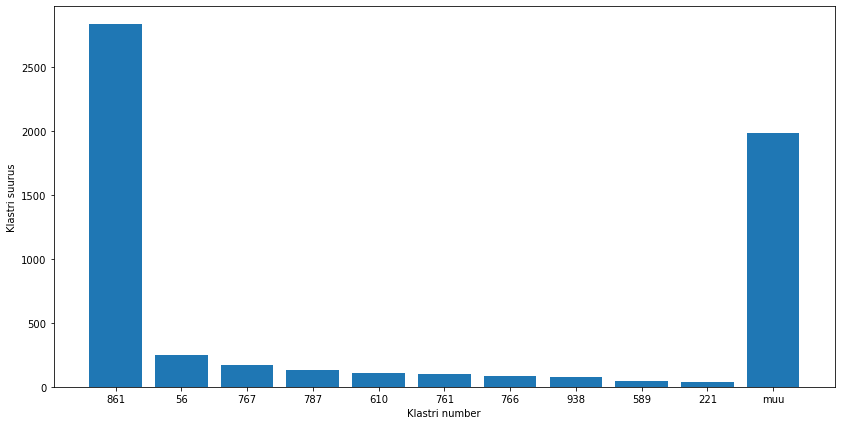

In [316]:
plt.figure(figsize=(14, 7))
plt.bar([label for label, count in chart_data], height=[count for label, count in chart_data])
plt.xlabel("Klastri number")
plt.ylabel("Klastri suurus")
# plt.savefig("jaccard_clust_esimene_barchart.png")
plt.show()

### Exploring results

#### Results from previous Jaccard clustering

In [35]:
for i in range(1000):
    if 'automaatkast' in labels[i]:
        print(i, labels[i])
        break

9 ['automaatkast', 'automaatkäigukast', 'käsikast']


In [331]:
for i in range(1000):
    if 'mees' in labels[i]:
        print(i, labels[i])
        break

402 ['inimene', 'mees', 'naine']


In [339]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'inimene'")
inimene_top_10 = cursor.fetchall()[:10]

In [340]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'mees'")
mees_top_10 = cursor.fetchall()[:10]

In [341]:
cursor.execute("SELECT * FROM final_pairs WHERE noun = 'naine'")
naine_top_10 = cursor.fetchall()[:10]

In [342]:
import networkx as nx

In [343]:
graph = nx.Graph()

In [345]:
inimene_top_10[0]

('noor', 'inimene', 4900)

In [346]:
adjs = list(set([paar[0] for paar in inimene_top_10] + [paar[0] for paar in mees_top_10] + [paar[0] for paar in naine_top_10]))

In [347]:
graph.add_nodes_from(['inimene', 'mees', 'naine'], pos='noun')
graph.add_nodes_from(adjs, pos='adjective')

In [348]:
pairs = list(set([(paar[0], paar[1]) for paar in inimene_top_10] + [(paar[0], paar[1]) for paar in mees_top_10] + [(paar[0], paar[1]) for paar in naine_top_10]))

In [349]:
pairs[:3]

[('olnud', 'inimene'), ('seotud', 'inimene'), ('vana', 'naine')]

In [350]:
graph.add_edges_from(pairs)

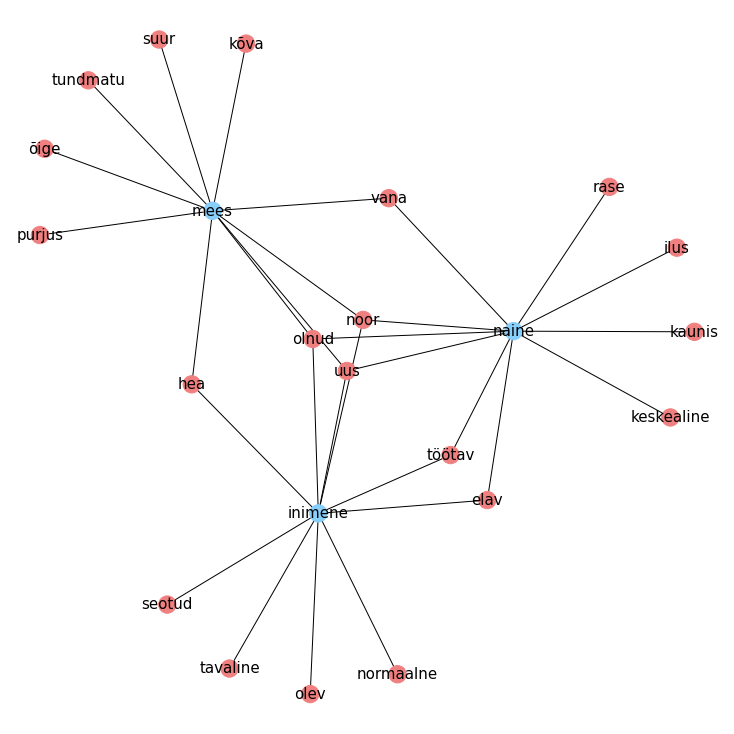

In [360]:
plt.figure(figsize=(10, 10))
nx.draw(graph, node_color=['lightskyblue' if graph.nodes[node]['pos'] == 'noun' else 'lightcoral' for node in graph.nodes()], with_labels = True, font_size=15)
# plt.savefig("inimene_mees_naine.png")
plt.show()

---

In [223]:
for i in range(1000):
    if len(labels[i]) < 15 and len(labels[i]) >= 3:
        print(labels[i])

['aastaaruanne', 'erimeede', 'eritingimus', 'teabevahetus']
['automaatkast', 'automaatkäigukast', 'käsikast']
['finaalmäng', 'torge', 'veerandaeg']
['infovahetus', 'lennuliiklus', 'seire']
['headus', 'maksimum', 'paremik']
['dressipüksid', 'samet', 'teksased']
['asuala', 'atleet', 'eestlanna', 'kergejõustiklane', 'põllumees', 'riigimaa', 'riigimets', 'tallinlane', 'tartlane', 'venelanna']
['dekoltee', 'elutuba', 'istekoht', 'jalats', 'salong', 'silmaring', 'tugitool', 'tööpõld', 'äraolemine', 'õu', 'ühistransport']
['mõrtsukas', 'mõrvar', 'tapja']
['arvestamine', 'hävimine', 'kompenseerimine', 'lammutamine', 'praak', 'rahuldamine', 'töövõimetus', 'tühistamine', 'ülalpidamine']
['kalamari', 'pael', 'parukas', 'rant', 'rätt', 'sõstar', 'uba']
['keskkonnateenistus', 'omavalitsusliit', 'päästeteenistus']
['ajaperiood', 'arupidamine', 'rihm', 'säilivusaeg', 'teatejooks', 'tutvustus', 'tähelend', 'varrukas']
['diktsioon', 'erinõue', 'piirjoon', 'pitser', 'suunis', 'tagamõte', 'väljendus']
['

#### Months

In [36]:
## mai pole enam andmestikus
kuud = ['jaanuar', 'veebruar', 'märts', 'aprill', 'mai', 'juuni', 'juuli', 'august', 'september', 'oktoober', 'november', 'detsember']
idx = []

for kuu in kuud:
    for i in range(1000):
        if kuu in labels[i]:
            idx.append(i)
            continue

In [37]:
idx

[910, 910, 910, 908, 910, 910, 910, 910, 861, 910, 910]

In [40]:
len(labels[861])

2835

In [224]:
'oktoober' in labels[861]

True

In [42]:
print(labels[910])

['august', 'detsember', 'jaanuar', 'juuli', 'juuni', 'märts', 'november', 'september', 'veebruar']


In [43]:
print(labels[908])

['aprill', 'eeluurimine', 'eesots', 'eluaeg', 'elutöö', 'inimkond', 'juhtunu', 'kaitseministeerium', 'maikuu', 'org', 'riigivara', 'sularaha']


#### Days

In [44]:
days = ['esmaspäev', 'teisipäev', 'kolmapäev', 'neljapäev', 'reede', 'laupäev', 'pühapäev']
idx2 = []

for day in days:
    for i in range(1000):
        if day in labels[i]:
            idx2.append(i)
            continue

In [45]:
idx2

[861, 861, 861, 861, 861, 861, 861]

In [46]:
len(labels[861])

2835

#### Aastaajad

In [227]:
aastaajad = ['talv', 'sügis', 'kevad', 'suvi']
idx7 = []

for day in aastaajad:
    for i in range(1000):
        if day in labels[i]:
            idx7.append(i)
            continue

In [228]:
idx7

[861, 861, 861, 861]

#### Artistic professions

In [225]:
jobs = ['laulja', 'näitleja', 'kunstnik', 'tantsija', 'artist']
idx3 = []

for job in jobs:
    for i in range(1000):
        if job in labels[i]:
            print(job)
            idx3.append(i)
            continue

laulja
näitleja
kunstnik
tantsija
artist


In [48]:
idx3

[861, 861, 861, 787, 861]

In [50]:
len(labels[787])

129

In [51]:
print(labels[787])

['abiprogramm', 'alaliit', 'allilm', 'arhitekt', 'armastatu', 'aselinnapea', 'assamblee', 'assistent', 'balletitantsija', 'boss', 'debüüt', 'dekaan', 'dirigent', 'disainer', 'eestimaalane', 'eksistents', 'ekspertkomisjon', 'ettekandja', 'finantsdirektor', 'haiglahoone', 'hollandlane', 'hoolealune', 'infoagentuur', 'insener', 'internetiühendus', 'judokas', 'julgeolekunõukogu', 'juurdepääs', 'kalamees', 'kalur', 'kasutusaeg', 'kasvandik', 'kaubavedu', 'keeleseadus', 'kehaehitus', 'kergejõustik', 'kinnisvaraturg', 'kirurg', 'kodukoht', 'komandör', 'kommunism', 'kriitik', 'kultuurimaja', 'kunstielu', 'kupee', 'käibemaksuseadus', 'kättesaadavus', 'kõneteenus', 'laeng', 'laenusumma', 'leegionär', 'leivaisa', 'ligipääs', 'liikluskindlustus', 'linnaosavanem', 'maadleja', 'maailmameister', 'maareform', 'majandussanktsioon', 'majandustulemus', 'massaaž', 'matk', 'meer', 'meister', 'monarh', 'munitsipaalettevõte', 'mälestis', 'mänedžer', 'mõisahoone', 'nauding', 'näpunäide', 'nõuanne', 'olend', '

#### Sports

In [226]:
spordialad = ['jalgpall', 'korvpall', 'pesapall', 'võrkpall', 'golf', 'tennis']
idx4 = []

for spordiala in spordialad:
    for i in range(1000):
        if spordiala in labels[i]:
            print(spordiala)
            idx4.append(i)
            continue

jalgpall
korvpall
tennis


In [53]:
idx4

[861, 861, 714]

In [229]:
len(labels[714])

29

In [55]:
print(labels[714])

['araablane', 'britt', 'jutumees', 'kaubavalik', 'keskendumine', 'kompliment', 'kujutlusvõime', 'kurd', 'leedulane', 'leibkond', 'liikuvus', 'läbimüük', 'lätlane', 'märklaud', 'pannkook', 'perekonnaliige', 'pidutsemine', 'pitsa', 'pöördemoment', 'semu', 'serblane', 'sigar', 'tennis', 'terasaak', 'tootlikkus', 'täituvus', 'vaadatavus', 'vabadussõda', 'vedamine']


#### Seasons

In [62]:
aastaajad = ['talv', 'tali', 'suvi', 'sügis', 'kevad']
idx5 = []

for aastaaeg in aastaajad:
    for i in range(1000):
        if aastaaeg in labels[i]:
            idx5.append(i)
            continue

In [63]:
idx5

[861, 861, 861, 861, 861]

### Further clustering of large cluster

In [67]:
for i in range(1000):
    if len(labels[i]) > 1000:
        print(i)

861


In [68]:
nouns_large_cluster = labels[861]

In [71]:
large_cluster_df = noun_df.loc[nouns_large_cluster][nouns_large_cluster]

In [72]:
print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
start = datetime.now()

model_large_cluster = SpectralClustering(n_clusters=1000, affinity='precomputed', random_state=0)
model_large_cluster.fit(large_cluster_df.values)

print(str(timedelta(seconds=time.time()+10800)).split(", ")[1])
print(datetime.now()-start)

19:07:52.811156
19:17:05.660795
0:09:12.848735


In [73]:
model_large_cluster.labels_

array([ 36, 247, 956, ..., 949, 807, 259])

In [75]:
for key, val in labels_large_cluster.items():
    if len(val) > 100:
        print(f"cluster number {key}, number of nouns in cluster {len(val)}")

cluster number 100, number of nouns in cluster 715
cluster number 807, number of nouns in cluster 110


In [74]:
labels_large_cluster = defaultdict(list)

for i, label in enumerate(model_large_cluster.labels_):
    labels_large_cluster[label].append(large_cluster_df.index[i])

In [319]:
topic_lens_ids_new = [(str(label), len(nouns)) for label, nouns in labels_large_cluster.items()]

In [320]:
sorted_lens_new = sorted(topic_lens_ids_new, key=lambda x: x[1], reverse=True)

In [327]:
chart_data_new = sorted_lens_new[:5]

In [328]:
other_new = 0

for label, count in sorted_lens_new[5:]:
    other_new += count

In [329]:
chart_data_new.extend([('muu', other_new)])

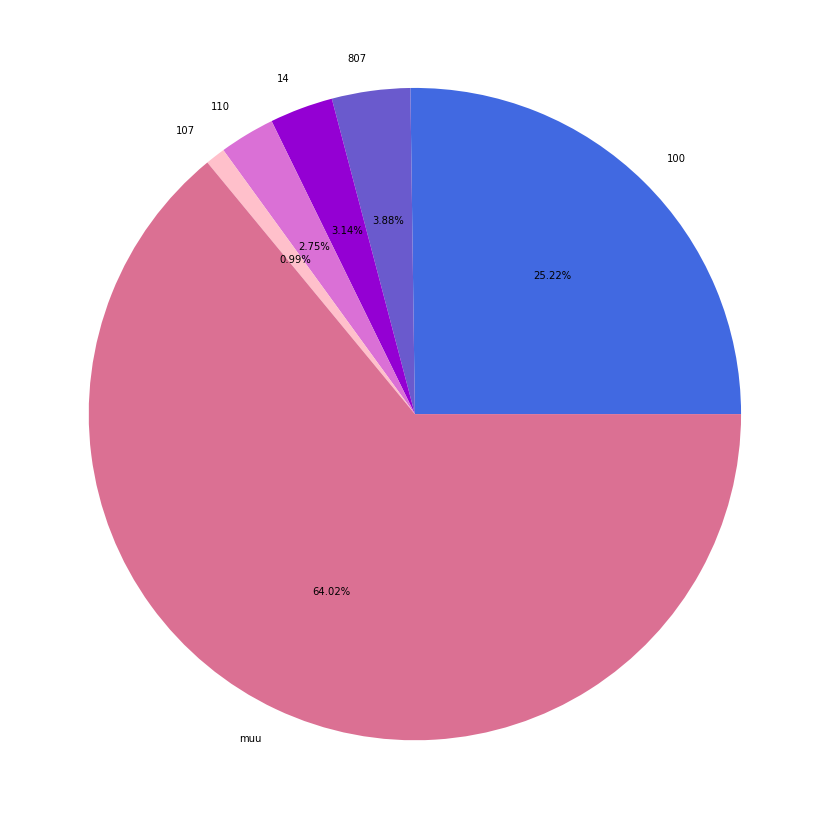

In [330]:
plt.figure(figsize=(15, 15))
counts = [count for label, count in chart_data_new]
lbls = [label for label, count in chart_data_new]
# , autopct='%1.2f%%'
#patches, texts = 
plt.pie(counts, labels=lbls, autopct='%1.2f%%', pctdistance=0.6,  colors=['royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink', 'palevioletred', 'indianred', 'coral', 'orange', 'moccasin', 'mediumturquoise'])
# plt.legend(patches, counts, loc="best")
# plt.savefig("jaccard_clust_teine_piechart.png")
plt.show()

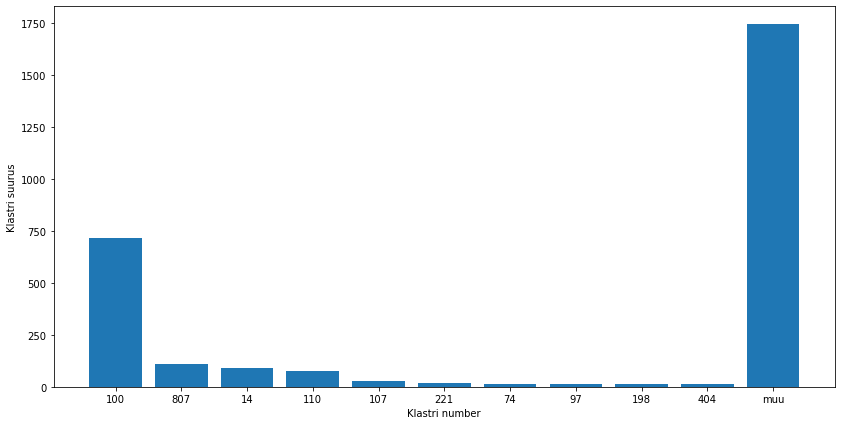

In [326]:
plt.figure(figsize=(14, 7))
plt.bar(lbls, height=counts)
plt.xlabel("Klastri number")
plt.ylabel("Klastri suurus")
# plt.savefig("jaccard_clust_teine_barchart.png")
plt.show()

### Results

In [88]:
for key, val in labels_large_cluster.items():
    if 'talv' in val and len(val) < 100:
        print(key, val)

612 ['sügis', 'tali', 'talv']


In [89]:
for key, val in labels_large_cluster.items():
    if 'suvi' in val and len(val) < 100:
        print(key, val)

84 ['kevad', 'suvi']


In [103]:
for key, val in labels_large_cluster.items():
    if 'teisipäev' in val and len(val) < 100:
        print(key, val)

244 ['kolmapäev', 'teisipäev']


In [104]:
for key, val in labels_large_cluster.items():
    if 'neljapäev' in val and len(val) < 100:
        print(key, val)

878 ['laupäev', 'neljapäev', 'pühapäev', 'reede']


In [230]:
for key, val in labels_large_cluster.items():
    if 'esmaspäev' in val:
        print(key, len(val))

100 715


In [232]:
professions = ['laulja', 'näitleja', 'kunstnik', 'tantsija', 'artist']

In [233]:
for key, val in labels_large_cluster.items():
    for prof in professions:
        if prof in val:
            print(key, prof, len(val))

100 laulja 715
100 näitleja 715
100 kunstnik 715
100 artist 715


In [234]:
for key, val in labels_large_cluster.items():
    for prof in ['jalgpall', 'korvpall']:
        if prof in val:
            print(key, prof, len(val))

100 korvpall 715
110 jalgpall 78


In [90]:
labels_large_cluster[0]

['aasta']

In [91]:
labels_large_cluster[1]

['eluase', 'elupaik']

In [92]:
labels_large_cluster[2]

['sissetulekuallikas', 'trump', 'tuluallikas']

In [93]:
labels_large_cluster[3]

['eurolaul', 'komeet', 'kuum', 'suvelavastus']

In [94]:
labels_large_cluster[4]

['efektiivsus', 'motivatsioon', 'stiimul']

In [95]:
labels_large_cluster[5]

['baar', 'filiaal', 'lihatööstus', 'tapamaja', 'toidupood']

In [96]:
labels_large_cluster[6]

['asetus', 'muster']

In [97]:
labels_large_cluster[7]

['jänes', 'madu', 'must', 'paberileht', 'telk', 'uss']

In [98]:
labels_large_cluster[8]

['farss']

In [99]:
labels_large_cluster[9]

['bussifirma', 'kinnisvarafirma', 'kütusefirma']

In [100]:
labels_large_cluster[10]

['esimees', 'juhataja', 'siseminister', 'välisminister']